## Integrantes

Jesus Artigas

Joaquin Sosa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [2]:
path = os.path.join("Datasets","hotel_bookings.csv")
df = pd.read_csv(path)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
56597,City Hotel,1,266,2016,September,37,9,0,2,2,...,Non Refund,37.0,NaN,32,Transient,105.0,0,0,Canceled,2016-01-19
104193,City Hotel,0,9,2017,January,1,5,0,3,2,...,No Deposit,9.0,NaN,0,Transient,90.1,0,1,Check-Out,2017-01-08
95577,City Hotel,0,40,2016,August,34,19,0,2,3,...,No Deposit,9.0,NaN,0,Transient,228.6,1,2,Check-Out,2016-08-21
90262,City Hotel,0,112,2016,June,23,2,0,2,2,...,No Deposit,3.0,NaN,0,Transient-Party,100.0,0,0,Check-Out,2016-06-04
782,Resort Hotel,0,0,2015,July,31,29,0,1,2,...,No Deposit,NaN,NaN,0,Transient,188.0,0,0,Check-Out,2015-07-30


## Realizar análisis exploratorio, limpieza y transformación de datos

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [8]:
# Reemplazar NULL en las columnos compañía y agente con 0
values = {'agent': 0, 'company': 0}
df.fillna(value = values, 
        inplace = True)


In [9]:
# Reemplazar NULL con los valores más frecuente de ese atributo (moda)
df['country'].fillna(df['country'].mode().iloc[0], 
        inplace = True)

In [10]:
# Remover las filas donde children se vea afectada por NULL
df.dropna(subset = ['children'], 
        inplace = True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Plots

In [12]:
df['country']=pd.Categorical(df['country'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119386 non-null  object  
 1   is_canceled                     119386 non-null  int64   
 2   lead_time                       119386 non-null  int64   
 3   arrival_date_year               119386 non-null  int64   
 4   arrival_date_month              119386 non-null  object  
 5   arrival_date_week_number        119386 non-null  int64   
 6   arrival_date_day_of_month       119386 non-null  int64   
 7   stays_in_weekend_nights         119386 non-null  int64   
 8   stays_in_week_nights            119386 non-null  int64   
 9   adults                          119386 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119386 non-null  int64   
 12  me

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
top_ten = df['country'].value_counts()[0:10]
top_ten

PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [16]:
top_ten.info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 10 entries, PRT to NLD
Series name: country
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 5.6 KB


C:\Users\jessd\AppData\Local\Temp\ipykernel_4344\4223983727.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ValueError: Could not interpret input 'country'

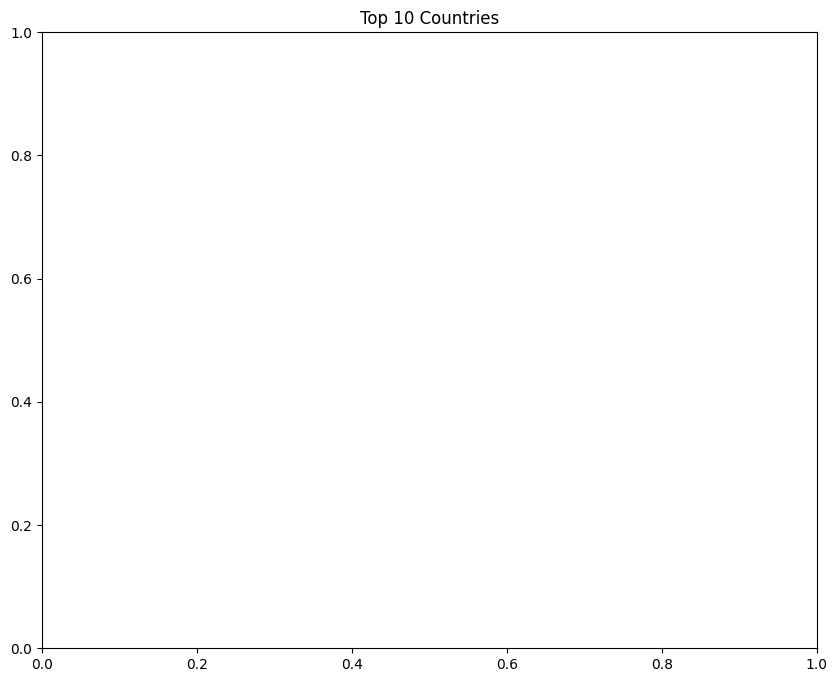

In [17]:
# Realizar un plot de los top 10 countries

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Top 10 Countries')
fig.show()

# Completar con los datos
sns.barplot( x="country", y=top_ten)
plt.show

In [18]:
sns.barplot(x=top_ten, y= top_ten.values())

TypeError: 'numpy.ndarray' object is not callable

In [20]:
pip install folium

     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 kB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Plot de cantidad de guests por country, de aquellos visitantes que no cancelaron

import folium
from folium.plugins import HeatMap
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
172,HND,0
173,IMN,0
174,JEY,0
175,MYT,0


In [20]:
df['country'].mode()

0    PRT
Name: country, dtype: category
Categories (177, object): ['ABW', 'AGO', 'AIA', 'ALB', ..., 'VNM', 'ZAF', 'ZMB', 'ZWE']

In [21]:
import plotly.express as px

In [24]:
basemap = folium.Map()
guests_map =  px.choropleth(country_wise_guests, 
                        locations = 'country',
                        color = 'No of guests', 
                        hover_name = 'No of guests',
                color_continuous_scale=px.colors.sequential.speed)
guests_map.show()

In [26]:
# Creamos un DF copia del original con una nueva columna arrival_date y la establecemos como objeto to_datetime
df_plot = df.copy()
df_plot['arrival_date'] = df_plot['arrival_date_day_of_month'].astype(str) +' '+ df_plot['arrival_date_month']+ ', '+ df_plot['arrival_date_year'].astype(str) 
df_plot['arrival_date'] = pd.to_datetime(df_plot['arrival_date'])
df_plot['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119386, dtype: datetime64[ns]

In [27]:
df_plot

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [28]:
df_plot['total_nights'] = df_plot["stays_in_weekend_nights"] + df_plot["stays_in_week_nights"]
df_tot = df_plot.groupby('total_nights').count()
df_tot = df_tot[df_tot['hotel']>50]['hotel']
df_tot

total_nights
0       715
1     21019
2     27641
3     27076
4     17383
5      7784
6      3857
7      8654
8      1161
9       841
10     1139
11      396
12      223
13      142
14      916
15       75
21       71
Name: hotel, dtype: int64

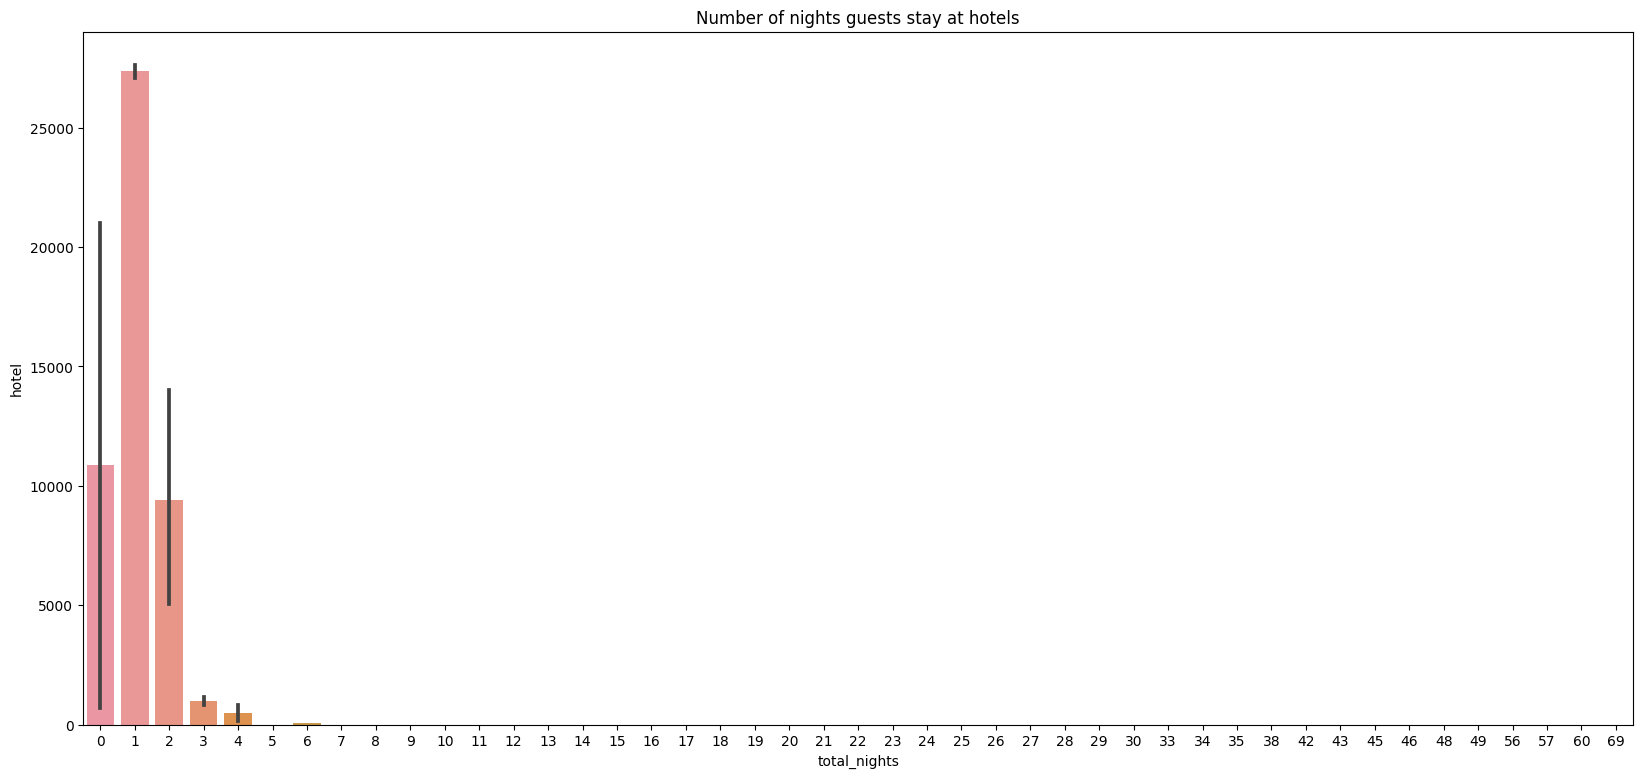

In [29]:
# Realizar un plot que me cuente la cantidad de noches por guests sobre el total de hoteles
fig, ax = plt.subplots(figsize = (20,9))
ax.set_title('Number of nights guests stay at hotels')

# Completar con datos
sns.barplot(x= df_plot['total_nights'] ,
            y= df_tot)
plt.show()

In [30]:
display(df_tot)

total_nights
0       715
1     21019
2     27641
3     27076
4     17383
5      7784
6      3857
7      8654
8      1161
9       841
10     1139
11      396
12      223
13      142
14      916
15       75
21       71
Name: hotel, dtype: int64

In [31]:
# Realizar un gráfico de Barras con Plotly

# Completar con datos

fig = px.bar(df_tot, 
            x='hotel', 
            y= df_tot)
fig.show()

In [36]:
# Completar con datos
fig = px.scatter(df_tot,
                x="hotel", 
                y= df_tot,
                size="hotel",
                log_x=True, size_max=60)
fig.show()